<a href="https://colab.research.google.com/github/PauloVilarinho/DataScience/blob/master/Projects/NewYorkAirbnbAirbnb_NewYork_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Data Analysis - *New York*

The [Airbnb](https://www.airbnb.com/) is considered to be  **the largest hotel bussiness in the world**. Even though **Airbnb doens’t own any hotel**!

Connecting people that want to travel, and need a place to crash on, with hosts that need to rent their unused apartments. The Airbnb is an inovative solution that is taking over the world, providing a easy way to connect those people. 

At the end of 2018, the Startup had already connected **over 300 million people around the world**, proving to be a massive power in the tourism industry.

One of the Airbnb projects is to provide data from most of the most important cities in the world. This data is provided at the [Inside Airbnb](http://insideairbnb.com/get-the-data.html), being a huge data set for *Data Science* developers.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**In this *notebook*, we will analyze the data linked to New York City and see what kind of information we can extract from this data set**

## Getting the Data
 All the data used here will be gathered at [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

for this introductory analysis, we will only be using this file:
* `listings.csv` - 	*Summary information and metrics for listings in New York City (good for visualisations).*


In [0]:
# importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# getting de the airbnb data and storing it into a DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2020-05-06/visualisations/listings.csv")

## Analyzing the Data


The first step after importing the data set, is to understant what kind of data you`re working with, and the best way to do that, is by doing a variable dictionary

**Variable Dictionary**

* `id` - number generated to identify the room.
* `name` - name of the room.
* `host_id` - number generated to identify the host.
* `neighbourhood_group` - describes in which district the room is located.
* `neighbourhood` - decribes in which neighbourhood the room is located.
* `latitude` - float number representing the latitude of the room.
* `longitude` - float number representing the longitude of the room.
* `room_type` - describes what type of room it is.
* `price` - price of the room per night
* `minimun_nights` - minimun number of nights to rent the room.
* `number_of_reviews` - number of reviews send to this room.
* `last_review` - date of the last review send to this room.
* `reviews_per_month` - avarage of rates per month to this room.
* `calculated_host_listings_count` - total amount of rooms that the owner of this one owns.
* `availability_365` -  number of days  that this room is available throughout the whole year

Before any further analysis, we will see the firts 10 rows of our data set.

In [4]:
# showing the first 10 lines of the DataFrame
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.38,2,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,318,2020-04-26,4.66,1,261
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.58,1,0
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.38,1,365
5,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,473,2020-03-15,3.53,1,272
6,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.91,1,0
7,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,161,2019-07-29,1.24,4,307
8,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76160,-73.98893,Private room,99,2,213,2020-03-01,1.57,1,0
9,5552,Spacious river view in the West Village,8380,Maria,Manhattan,West Village,40.73552,-74.01042,Entire home/apt,160,3,66,2019-08-10,0.50,1,116


Now that we understand this data set, lets try to answer some questions using the information in this data.

### **Q1. How many columns and rows does this data set has? What are the types of the variable at the data set columns?**

The next thing we need to do is evaluate the size of the data Set and How this data is stored. 

In [5]:
# identify the Data Frame Size

print("Rows:\t {}".format(df.shape[0]))
print("Columns:\t {}\n".format(df.shape[1]))

# verify the data type for each column

display(df.dtypes)

Rows:	 50246
Columns:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

As you can see, we have a data set of 50246 rows and 16 columns, this is not the full data, since we are using a more simplified version of the dataset from Airbnb. The original one has **more than 100 columns**, so, since this is a brief analysis, we will be using this simplefied version. 



### **Q2. How many rows has empty values in each column*?**

the number of empty values is a very important metric to measure the acurracy of the data set, since the emptier a column is the more irrelevant it will be to your analysis.

In [6]:
# this function returns True for when the value is empty and False for when its not
df.isnull() 


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50241,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
50242,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
50243,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
50244,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [7]:
# now we are going to sum all the columns and divide by the number of rows, to see at what rate does each column has empty values
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.219520
last_review                       0.219520
name                              0.000358
host_name                         0.000219
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

This percentage shows that 21% of all rooms does not have a review, which probably means that those rooms were never rent.

### **Q3. How the Atributes are distrubuted across the Data Set ?** 

To see how those variables are distributed, we are going to plot an histogram.

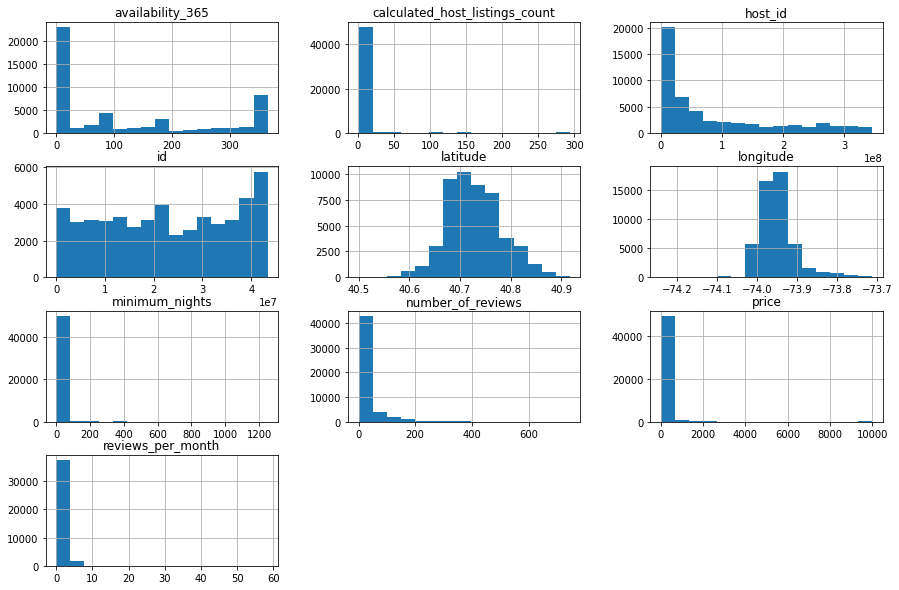

In [8]:
# plot histogram of numeric values

df.hist(bins=15, figsize=(15,10) );


This is a large amount of information to sink in, so let`s go step by step.

As you guys can see a huge amount of rooms are only available through a small portion of the year, represented by this huge bar at the beginning of the histogram, but there is also an expressive amount of rooms that is available throughout the whole year, represented by the bar at the end.

Looking at the `calculated_host_listing_counts` variable, you can see something realy odd, there is a small bar that says that are more than 100 apartaments with this value above 200. So let`s take a look at this data by filtering the rows.



In [9]:
#list of rooms with more than 200 calculated_host_listings_count
df[df['calculated_host_listings_count'] > 200]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22783,20845031,"Homey Midtown East 1BR w/ Gym, Doorman, near t...",107434423,Blueground,Manhattan,Kips Bay,40.74572,-73.97986,Entire home/apt,216,30,0,NaN,NaN,294,318
25267,22370388,"Calming FiDi 1BR w/ lux Gym, Speakeasy + Doorm...",107434423,Blueground,Manhattan,Financial District,40.70558,-74.00838,Entire home/apt,239,30,1,2018-08-17,0.05,294,218
26111,23264421,"Mod Midtown East 1BR w/ Gym, walk to Grand Cen...",107434423,Blueground,Manhattan,Murray Hill,40.74841,-73.97987,Entire home/apt,271,30,0,NaN,NaN,294,281
26334,23538486,"Posh Park Avenue 1BR w/ Gym, Doorman in Midtow...",107434423,Blueground,Manhattan,Murray Hill,40.74841,-73.97987,Entire home/apt,204,30,1,2019-01-15,0.06,294,365
27187,24535218,"Luxury Tribeca 1BR w/ Gym, Doorman + Roof deck...",107434423,Blueground,Manhattan,Tribeca,40.71383,-74.01024,Entire home/apt,255,30,0,NaN,NaN,294,219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48729,42806911,"Sleek Chelsea 2BR, w/ Washer & Dryer in unit, ...",107434423,Blueground,Manhattan,Chelsea,40.74437,-73.99319,Entire home/apt,235,30,0,NaN,NaN,294,0
48824,42868618,"Airy Midtown West 1BR w/ DM, Gym, W/D, nr. Tim...",107434423,Blueground,Manhattan,Hell's Kitchen,40.76206,-73.99886,Entire home/apt,229,30,0,NaN,NaN,294,0
48825,42868661,"Cozy Hell's Kitchen 1BR w/ Pool, Gym, Doorman,...",107434423,Blueground,Manhattan,Hell's Kitchen,40.76057,-73.99668,Entire home/apt,240,30,0,NaN,NaN,294,0
48981,42938323,"Ideal Kips Bay 1BR w/ Doorman, Elevator, Gym, ...",107434423,Blueground,Manhattan,Kips Bay,40.74160,-73.97859,Entire home/apt,182,30,0,NaN,NaN,294,304


As you can see there is 294 rooms that have a value in `calculated_host_listings_count` higher than 200, but they are all owned by the same host. Thats the nature of this value, since it is related to the amount of rooms owned by the host of the room, every time you see a value in this column, you are going to see at least this same amount of rows with this same value, creating a little bit of distortion at this histogram.

There isn`t much you can extract from the id and host_id columns, since they are only identificantion numbers.

The latitude and longitude columns show to us that is a huge concentration in some regions, so lets try to visualize that.



In [10]:
df.neighbourhood_group.value_counts() / df.shape[0]

Manhattan        0.445448
Brooklyn         0.400748
Queens           0.122577
Bronx            0.023863
Staten Island    0.007364
Name: neighbourhood_group, dtype: float64

this is the percentage of rooms in which district, showing to us that almost 85% of all rooms are located in Brooklying or Manhattan, explaing our latitude and longitude distribution. 

Numbers of reviews and Reviews per month shows what we expected, most of the apartments are not rented that often, leading to a low number of reviews, and the best ones have a huge amount of reviews, since they are more used.

Minimum nights shows us some weird distributions, telling us that some rooms requires **over 1000 nights** at minimum to be hosted at them, which seems a bit strange for an Airbnb room. This rooms are what we call outliers, rows that represents values completely diferent from the others and sometimes it will mess with your final analysis. Since this is a brief analysis we will mantaing the data set as it is now.

The Price column show some similarities to the minimun nights distributions, but there are things to be considered. At the end of that histogram there is a more expressive column than at the minimum nights variable, representing a bigger number os apartaments at a higher price, and since we are at New York, this is not something that surprise us. Lets take a look at the most expensives rooms.

In [11]:
df[df['price'] > 8000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5764,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
10901,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.11,1,83
15653,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.12,1,0
15701,13925864,Astoria 35-41,58480311,Raquel-Ast,Queens,Long Island City,40.76168,-73.92986,Entire home/apt,10000,2,28,2018-01-03,0.61,1,36
23320,21260337,Shared Apartment for Adventurous Traveler,8216122,Rivington,Brooklyn,Manhattan Beach,40.57967,-73.95337,Shared room,10000,2,0,NaN,NaN,1,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48467,42687566,Luxury Designer Suite in Times Square w/ Break...,244370442,Paramount Hotel,Manhattan,Theater District,40.76011,-73.98667,Private room,10000,1,0,NaN,NaN,9,296
49937,43265776,"Citadines Connect 5th Ave, Premier King",340938089,Natalie,Manhattan,Midtown,40.75508,-73.98097,Entire home/apt,10000,1,0,NaN,NaN,4,365
49938,43265806,"Citadines Connect 5th Ave, Premier Double",340938089,Natalie,Manhattan,Midtown,40.75640,-73.97916,Entire home/apt,10000,1,0,NaN,NaN,4,365
49939,43265846,"Citadines Connect 5th Ave, Presidential Suite",340938089,Natalie,Manhattan,Midtown,40.75557,-73.98050,Entire home/apt,10000,1,0,NaN,NaN,4,365


As you can see there are 68 rooms with prices above 8000 dolars, representing the luxurious rooms at the city.

### **Q4. How much does it cost to spend a night at New York?**

Since New York is an expensive city to live, it would be useful to know some data about the price of a room at the city, so let`s take a look. 

In [12]:
# see the value at price column
df.price.describe()


count    50246.000000
mean       163.130777
std        421.687803
min          0.000000
25%         68.000000
50%        104.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

The values above shows us that the avarage price per night is 163 US Dolars, which can be expensive, especially if you live in Brazil like me, but since the luxurious rooms lift the mean by a good margin, you probably would be able to rent good rooms for 100 US Dolars a night or even less.

### **Q5. What is the correlation between the existing variabels?**

When we talk abou correlation, we are trying to understand how much the value of one column can impact the others columns.

So to find that impact, we should make a correlation matrix. In this matrix if the value is positive it means that for some unknown reason, when the column listed on the right goes up, the value listed on top goes up, and if the value goes down, the other value goes down.
If the value found is negative, the values grow at diferent directions, once one goes up, the other goes down and vice versa.

We are only looking for signs of strong correlation (values above 0.5), since small values normaly means that those values have no correlation whatsoever. 


In [13]:
# create a correlation matrix
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()


# show correlation matrix
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.017178,-0.036491,-0.009299,0.010577,0.064419
minimum_nights,0.017178,1.000000,-0.081439,-0.104093,0.166418,0.147477
number_of_reviews,-0.036491,-0.081439,1.000000,0.699320,-0.080117,0.186228
reviews_per_month,-0.009299,-0.104093,0.699320,1.000000,-0.064513,0.209332
calculated_host_listings_count,0.010577,0.166418,-0.080117,-0.064513,1.000000,0.167157
availability_365,0.064419,0.147477,0.186228,0.209332,0.167157,1.000000


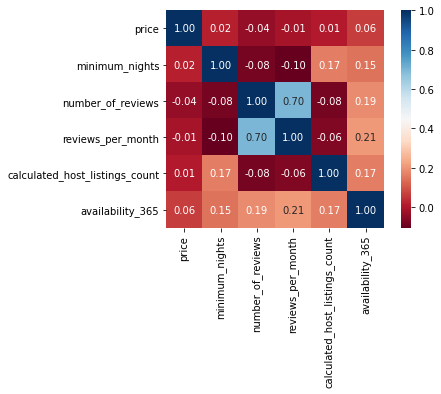

In [14]:
# plot a heatmap based upon the correlations
sns.heatmap(corr,cmap="RdBu", fmt='.2f', square=True, linecolor='white',annot=True)

This matrix show us that the only values that are realy correlated are `number_of_reviews` and `reviews_per_month` represented by a 0.7 correlation factor, which seems kind o logical. 



### **Q6. What is the most available room type?**

Now let`s see how many of each room type there is in New York.

In [15]:
# show the amount of rooms by type
df.room_type.value_counts()

Entire home/apt    26073
Private room       22599
Shared room         1140
Hotel room           434
Name: room_type, dtype: int64

In [16]:
# show the percentage of rooms by type
df.room_type.value_counts()/ df.shape[0]

Entire home/apt    0.518907
Private room       0.449767
Shared room        0.022688
Hotel room         0.008638
Name: room_type, dtype: float64

So 96% of all the rooms are Entire home/apt or Private room. Having the majority of the rooms in these two categories seems to be a trend at the Airbnb.

### **Q7. At what place is more expensive to rent a room ?**

Now that we alredy have some information about the rooms and the prices, it`s time to see where is more expensive to stay.


In [17]:
# see prices by district.
df.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)


neighbourhood_group
Manhattan        219.378652
Brooklyn         125.147547
Staten Island    117.321622
Queens            99.725118
Bronx             90.866555
Name: price, dtype: float64

As expected, Manhattan is the most expensive area to stay, with the huge ammount of 219 US Dolars as its mean value. Now it`s time do dive into the neighbourhoods

In [18]:
# see prices by neighbourhoog.
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[0:10]


neighbourhood
Woodrow             2350.000000
Country Club        1000.000000
Manhattan Beach      861.538462
Fort Wadsworth       700.000000
Prince's Bay         506.666667
Midtown              503.619188
Theater District     487.131805
Tribeca              418.358974
Sea Gate             369.076923
Riverdale            337.000000
Name: price, dtype: float64

As we can see there is some weird things going on. All the first 5 on the list show an enourmous amount compared to the region they are located, even beating Midtown, even do Midtown should be the ultimate premium location in New York. Let`s check the data about those 5 regions. 

In [19]:
df[df['neighbourhood'] == "Woodrow"]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2650,1798271,Spacious center hall colonial,9430973,Donna,Staten Island,Woodrow,40.53884,-74.19826,Entire home/apt,700,7,0,NaN,NaN,1,0
49032,42949093,S.I. home,341475072,Kareem,Staten Island,Woodrow,40.53865,-74.19631,Entire home/apt,4000,1,0,NaN,NaN,1,220


Woodrow has only 2 rooms, and none of them have reviews, meaning they probably were never rented. Also there is a ** 4000 US Dolars ** room, thats unusual for a Staten Island Location.

In [20]:
df[df['neighbourhood'] == "Country Club"]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
39422,36867595,Boat tours to the city and back,66362469,Eddie,Bronx,Country Club,40.84426,-73.81532,Shared room,1000,1,0,NaN,NaN,1,179


In [21]:
df[df['neighbourhood'] == "Fort Wadsworth"]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22158,20305160,Beach House Retreat. 15 minutes from Manhattan.,1715301,Mark,Staten Island,Fort Wadsworth,40.59546,-74.06092,Entire home/apt,700,2,0,NaN,NaN,5,360


Country club and Fort Wadsworth has only one apartament each, with a similar situation to the Woodrow rooms.

In [22]:
df[df['neighbourhood'] == "Manhattan Beach"]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7092,6179073,Mini Studio in NY city safest area,32052000,Gennady + Laura,Brooklyn,Manhattan Beach,40.57770,-73.93988,Private room,45,3,136,2020-03-19,2.24,2,304
7468,6492185,A beautiful and friendly beach area,33929905,Oleg,Brooklyn,Manhattan Beach,40.57817,-73.95277,Entire home/apt,140,7,68,2020-02-23,1.18,1,174
14405,13107627,Private Bedroom w/ Private Bath/Mini Fridge,72542338,Mychelle,Brooklyn,Manhattan Beach,40.58078,-73.95356,Private room,125,2,27,2020-02-03,0.56,1,220
14515,13170159,Brooklyn Brand New Studio,62535444,Alex,Brooklyn,Manhattan Beach,40.57867,-73.95227,Entire home/apt,99,1,53,2020-02-22,1.12,2,365
14625,13243615,Big Studio Apartment near Ocean Beach,17770598,Maya,Brooklyn,Manhattan Beach,40.57750,-73.94003,Entire home/apt,79,1,0,NaN,NaN,1,0
16531,14789008,"Spacious 1BR amazing view, Beach 5 min, airpor...",26759986,Aziz,Brooklyn,Manhattan Beach,40.58249,-73.95347,Entire home/apt,150,30,2,2016-09-20,0.05,1,0
16851,15158791,"SPECIAL: Luxury Apt, Close to Transp, Beach & ...",84558839,Mitch,Brooklyn,Manhattan Beach,40.58085,-73.93934,Entire home/apt,120,2,97,2020-03-08,2.20,1,347
17154,15507375,"Private Studio, Oceanside beautiful and safe area",32052000,Gennady + Laura,Brooklyn,Manhattan Beach,40.57821,-73.94122,Entire home/apt,55,4,119,2020-03-22,2.81,2,276
23320,21260337,Shared Apartment for Adventurous Traveler,8216122,Rivington,Brooklyn,Manhattan Beach,40.57967,-73.95337,Shared room,10000,2,0,NaN,NaN,1,88
34665,32401290,Cozy private bedroom with amazing view.,125408735,Ferhat,Brooklyn,Manhattan Beach,40.58179,-73.95358,Shared room,99,2,1,2020-01-20,0.27,1,0


Manhattan Beach presents a diferent behaviour. It has a small amount of cheap rooms and a **10000 US Dolars** room, which completely distort the mean value.

In [23]:
df[df['neighbourhood'] == "Prince's Bay"]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
16322,14506086,Cute Lofted Apt.,22847606,Patricia,Staten Island,Prince's Bay,40.52211,-74.18028,Entire home/apt,185,2,15,2018-08-07,0.34,1,0
35977,33804180,STATEN ISLD UNIVER. HOSPITAL SOUTH - 10 MIN AWAY,163169045,Janice,Staten Island,Prince's Bay,40.52293,-74.21238,Entire home/apt,85,2,28,2020-03-03,2.23,1,119
37182,34835762,Central Hall Colonial with Free Parking Bus EX...,252051657,Anastasios,Staten Island,Prince's Bay,40.53076,-74.20295,Entire home/apt,1250,14,0,NaN,NaN,1,0


Prince`s Bays has only 3 rooms, with one room with a 1250 dolars price per night, making the mean go way higher than it should. 

So let`s clear this values and see what the mean price by neighbourhood should look like.

In [24]:
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[5:15]

neighbourhood
Midtown              503.619188
Theater District     487.131805
Tribeca              418.358974
Sea Gate             369.076923
Riverdale            337.000000
Flatiron District    328.487179
Willowbrook          309.000000
Fieldston            287.538462
NoHo                 269.773810
Little Italy         263.469136
Name: price, dtype: float64

To finish this topic let`s see how this rooms are distributed geographically.

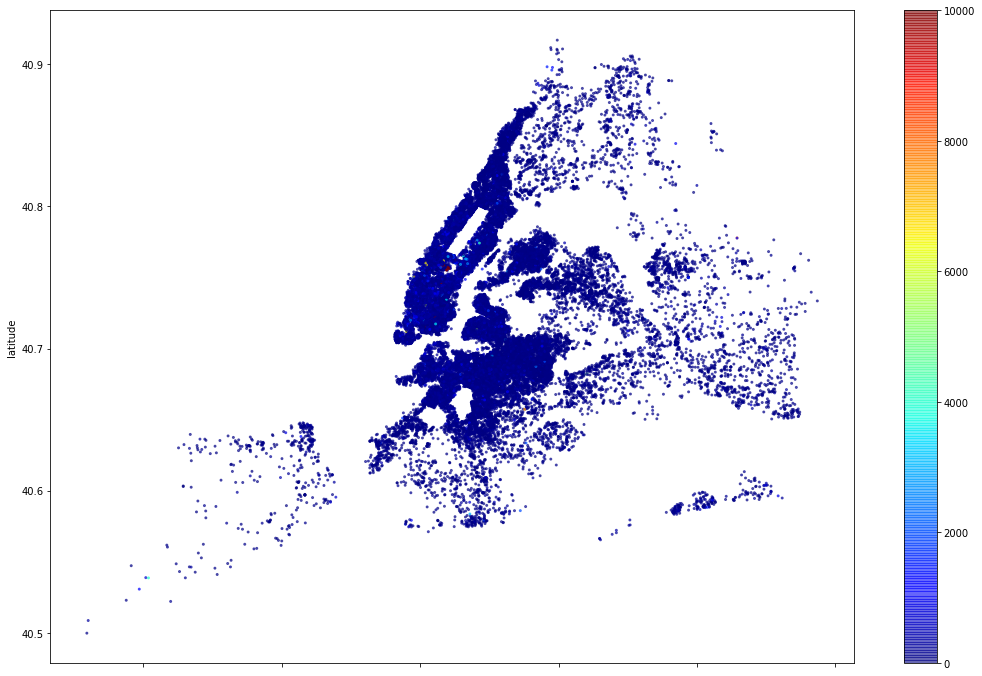

In [36]:
df.plot(kind='scatter', x = 'longitude', y ='latitude', alpha=0.6, c=df['price']
        , s=4, cmap = plt.get_cmap('jet'), figsize = (18,12));

This maps clearly shows the manhatan and brooklyin are the areas with the most amount of rooms. Also, manhatan has the most amount of expesive rooms, which is visible by the brighter dots at the island.

This huge retangular white void at the manhatan island is the Central park, where there is no building at all.

### **Q8.What is the mean minimum nights required to rent a room ?**

Now that we alredy now information about the prices and room types,, we will be exploring the minimun nights required to stay at a room. 

First we are gonna make a view on the statistical data about this variable.

In [27]:
# see statisticla data abou minimum nights 
df.minimum_nights.describe()

count    50246.000000
mean         7.912968
std         21.472286
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

Was we said earlier, the outliers seems to be distorting a lot our mean value. As you can see this column has a huge standard deviation, meaning we cant trust too much in this mean value of 7.9.

Also as you can see 75% of the apartments has a minimun nights value of 5 or less, proving that this mean value doesn`t correlate to the reality your expected to face when renting a room.

## Conclusions


This is only a brief and superficial analysis of the airbnb data, but its clear that there are outliers in some variables, more especifically at the `price` and `minimum_nights` columns.

Its also very noticeable that some neighbourhoods have a small number off rooms, distorting some estatistical values and messing up with some information.

At last, this is a simpler version of the of the New York Airbnb data set, so there is alot more data that can be extracted at the full version. The full data set has 106 columns.